In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("original (3).csv",index_col=0)

In [4]:
data.head()

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10
S001,1,1,1,1,1,1,1,1,1,1
S002,1,1,0,1,1,1,1,1,1,1
S003,1,1,1,1,1,0,1,1,1,1
S004,1,1,1,0,1,1,1,1,1,1
S005,0,1,1,1,1,1,1,1,1,1


In [6]:
#項目困難度
item_diff = data.mean()
item_diff

Q01    0.771739
Q02    0.923913
Q03    0.706522
Q04    0.891304
Q05    0.967391
Q06    0.891304
Q07    0.869565
Q08    0.815217
Q09    0.923913
Q10    0.913043
dtype: float64

In [8]:
#Q1に正答、誤答した人の割合
p = len(data[data["Q01"]==1])/len(data)
q = len(data[data["Q01"]==0])/len(data)

#Q1に正答、誤答した人のテストの平均値
X_p = data[data["Q01"]==1].sum(axis=1).mean()
X_q = data[data["Q01"]==0].sum(axis=1).mean()

SD = data.sum(axis=1).std()

In [9]:
#点双列相関係数の算出
r_pbi = (np.sqrt(p*q)*(X_p-X_q)/SD)

In [10]:
r_pbi

0.5797567974416593

In [11]:
#for文で全ての点双列相関係数を求める

#計算結果を入れるリストを作る
R_pbi = []

#標準偏差は共通
SD = data.sum(axis=1).std()

for i in data.columns:
    p = len(data[data[i]==1])/len(data)
    q = len(data[data[i]==0])/len(data)
    X_p = data[data[i]==1].sum(axis=1).mean()
    X_q = data[data[i]==0].sum(axis=1).mean()
    r_pbi = (np.sqrt(p*q)*(X_p-X_q)/SD)
    R_pbi.append(r_pbi)

R_pbi


[0.5797567974416593,
 0.19789666579271892,
 0.39789120504323705,
 0.4200705927459606,
 0.4407413274125061,
 0.4953559717056259,
 0.3267216171199718,
 0.4921935415353276,
 0.5219604615568473,
 0.34350154895027657]

In [13]:
x1 = 1
x2 = 5
y1 = 2
y2 = 3

Text(0, 0.5, 'Discrimination Power')

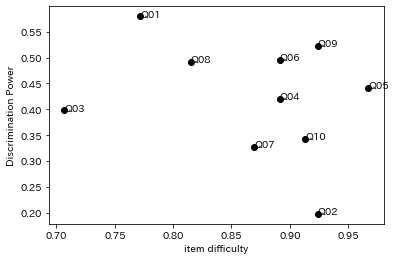

In [15]:
#散布図
for i,j,k in zip(item_diff,R_pbi,data.columns):
    plt.plot(i,j,"o",color="k")
    plt.annotate(k,xy=(i,j))

plt.xlabel("item difficulty")
plt.ylabel("Discrimination Power")